# Nutrition Facts for McDonald's Menu

In [1]:
#import library
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics

## Data Extraction

In [2]:
#load dataset
df = pd.read_csv('menu.csv')

In [3]:
#show 5 rows ahead
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


## Exploratory Data Analysis (EDA)

In [4]:
#check total rows and columns
df.shape

(260, 24)

In [5]:
#check columns
df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [6]:
#check missing value
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [7]:
#check dataset type
df.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [8]:
#describe dataset
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [9]:
#check distribution of dataset
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Calories,1.452498,5.778796
Calories from Fat,2.145508,10.605606
Total Fat,2.152799,10.682321
Total Fat (% Daily Value),2.162011,10.756404
Saturated Fat,0.663685,-0.426466
Saturated Fat (% Daily Value),0.685296,-0.368249
Trans Fat,2.135819,4.295495
Cholesterol,3.798907,17.388874
Cholesterol (% Daily Value),3.804200,17.433757
Sodium,1.544088,2.874380


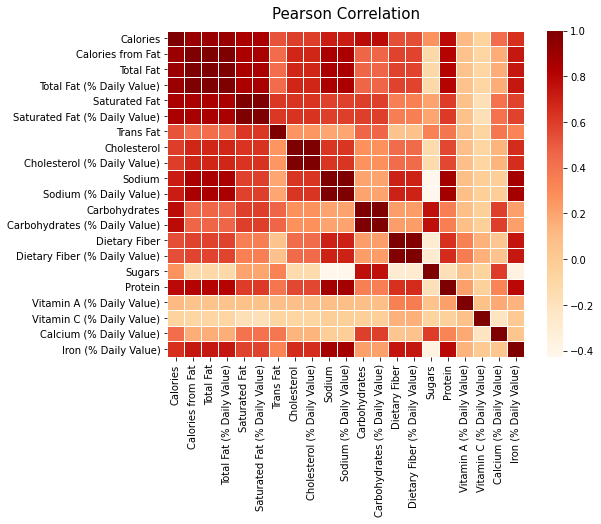

In [10]:
#visualize correlation of each variables using pearson correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), linewidths = 0.9, cmap = 'OrRd')
plt.title('Pearson Correlation', fontsize = 15, pad = 12)
plt.show()

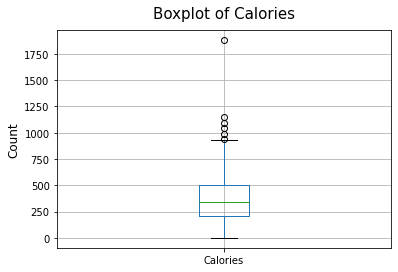

Average of Calories : 368.2692307692308
Maximum of Calories : 1880
Median of Calories : 340.0
Minimum of Calories : 0


In [11]:
#check outlier
df.boxplot(column = ['Calories'])
plt.title('Boxplot of Calories', fontsize = 15, pad = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

print('Average of Calories :', df['Calories'].mean())
print('Maximum of Calories :', df['Calories'].max())
print('Median of Calories :', df['Calories'].median())
print('Minimum of Calories :', df['Calories'].min())

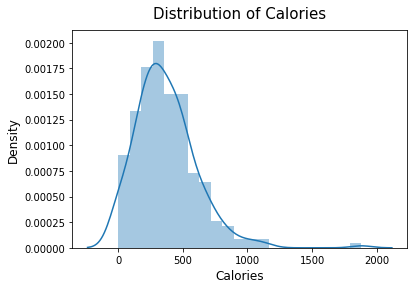

In [12]:
#visualize distribution of calories
sns.distplot(df['Calories'])
plt.title('Distribution of Calories', fontsize = 15, pad = 12)
plt.xlabel('Calories', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.show()

In [13]:
#check unqiue of category
df['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

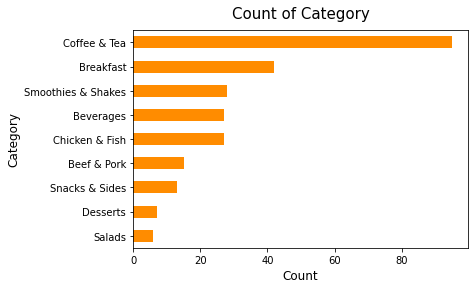

In [14]:
#check count of category
df['Category'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'darkorange')
plt.title('Count of Category', fontsize = 15, pad = 12)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Category', fontsize = 12)
plt.show()

In [15]:
#check unique of item
df['Item'].unique()

array(['Egg McMuffin', 'Egg White Delight', 'Sausage McMuffin',
       'Sausage McMuffin with Egg', 'Sausage McMuffin with Egg Whites',
       'Steak & Egg McMuffin',
       'Bacon, Egg & Cheese Biscuit (Regular Biscuit)',
       'Bacon, Egg & Cheese Biscuit (Large Biscuit)',
       'Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)',
       'Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)',
       'Sausage Biscuit (Regular Biscuit)',
       'Sausage Biscuit (Large Biscuit)',
       'Sausage Biscuit with Egg (Regular Biscuit)',
       'Sausage Biscuit with Egg (Large Biscuit)',
       'Sausage Biscuit with Egg Whites (Regular Biscuit)',
       'Sausage Biscuit with Egg Whites (Large Biscuit)',
       'Southern Style Chicken Biscuit (Regular Biscuit)',
       'Southern Style Chicken Biscuit (Large Biscuit)',
       'Steak & Egg Biscuit (Regular Biscuit)',
       'Bacon, Egg & Cheese McGriddles',
       'Bacon, Egg & Cheese McGriddles with Egg Whites',
       'Sau

In [16]:
#check count of item
df['Item'].value_counts()

Diet Dr Pepper (Small)          1
Oatmeal Raisin Cookie           1
Caramel Mocha (Medium)          1
Strawberry Shake (Medium)       1
Hot Fudge Sundae                1
                               ..
Iced Mocha (Medium)             1
Chicken McNuggets (40 piece)    1
Iced Mocha (Large)              1
Frappé Caramel (Medium)         1
Hot Chocolate (Large)           1
Name: Item, Length: 260, dtype: int64

In [17]:
#check unique of serving size
df['Serving Size'].unique()

array(['4.8 oz (136 g)', '4.8 oz (135 g)', '3.9 oz (111 g)',
       '5.7 oz (161 g)', '6.5 oz (185 g)', '5.3 oz (150 g)',
       '5.8 oz (164 g)', '5.4 oz (153 g)', '5.9 oz (167 g)',
       '4.1 oz (117 g)', '4.6 oz (131 g)', '5.7 oz (163 g)',
       '6.2 oz (177 g)', '6.4 oz (181 g)', '5 oz (143 g)',
       '5.5 oz (157 g)', '7.1 oz (201 g)', '6.1 oz (174 g)',
       '6.3 oz (178 g)', '5 oz (141 g)', '7.2 oz (205 g)',
       '6.9 oz (197 g)', '8.5 oz (241 g)', '9.5 oz (269 g)',
       '10 oz (283 g)', '9.6 oz (272 g)', '10.1 oz (286 g)',
       '14.8 oz (420 g)', '15.3 oz (434 g)', '14.9 oz (423 g)',
       '15.4 oz (437 g)', '5.3 oz (151 g)', '6.8 oz (192 g)',
       '2 oz (56 g)', '4 oz (114 g)', '9.6 oz (251 g)', '7.4 oz (211 g)',
       '7.1 oz (202 g)', '8 oz (227 g)', '8.3 oz (235 g)',
       '8.6 oz (244 g)', '3.5 oz (98 g)', '4 oz (113 g)',
       '9.5 oz (270 g)', '5.2 oz (147 g)', '6.7 oz (190 g)',
       '5.6 oz (159 g)', '7.3 oz (208 g)', '7.5 oz (213 g)',
       '7 oz (20

In [18]:
#check count of serving size 
df['Serving Size'].value_counts()

16 fl oz cup       45
12 fl oz cup       38
22 fl oz cup       20
20 fl oz cup       16
21 fl oz cup        7
                   ..
15.4 oz (437 g)     1
6.4 oz (182 g)      1
3.5 oz (98 g)       1
5.3 oz (151 g)      1
6.8 oz (192 g)      1
Name: Serving Size, Length: 107, dtype: int64

In [19]:
#analyze average of calories based on category
pd.pivot_table(df, index = 'Category', values = 'Calories', aggfunc = {'Calories' : np.mean}).sort_values('Calories',
                                                                                                         ascending = False)

,Calories
Category,
Chicken & Fish,552.962963
Smoothies & Shakes,531.428571
Breakfast,526.666667
Beef & Pork,494.000000
Coffee & Tea,283.894737
Salads,270.000000
Snacks & Sides,245.769231
Desserts,222.142857
Beverages,113.703704


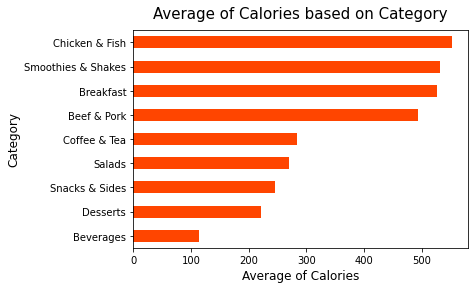

In [20]:
#visualize average of calories based on category
df.groupby('Category')['Calories'].mean().sort_values(ascending = True).plot(kind = 'barh', color = 'orangered')
plt.title('Average of Calories based on Category', fontsize = 15, pad = 12)
plt.xlabel('Average of Calories', fontsize = 12)
plt.ylabel('Category', fontsize = 12)
plt.show()

In [21]:
#analyze average of calories based on top 20 items
top10_item = pd.pivot_table(df, index = 'Item', values = 'Calories', aggfunc = {'Calories' : np.mean}).sort_values(
    'Calories', ascending = False)
top10_item.head(20)

,Calories
Item,
Chicken McNuggets (40 piece),1880
Big Breakfast with Hotcakes (Large Biscuit),1150
Big Breakfast with Hotcakes (Regular Biscuit),1090
Big Breakfast with Hotcakes and Egg Whites (Large Biscuit),1050
Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit),990
Chicken McNuggets (20 piece),940
McFlurry with M&M’s Candies (Medium),930
Chocolate Shake (Large),850
Strawberry Shake (Large),850


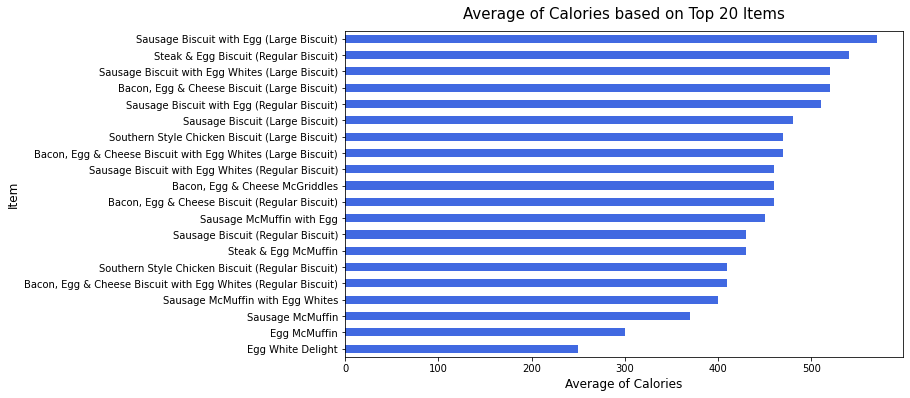

In [22]:
top20_items = df['Item'][:20]

#visualize average of calories based on top 20 items
plt.figure(figsize = (10,6))
df.groupby(top20_items)['Calories'].mean().sort_values(ascending = True).plot(kind = 'barh', color = 'royalblue')
plt.title('Average of Calories based on Top 20 Items', fontsize = 15, pad = 12)
plt.xlabel('Average of Calories', fontsize = 12)
plt.ylabel('Item', fontsize = 12)
plt.show()

In [23]:
#analyze average of calories based on top 20 serving size
top20_serving_size = pd.pivot_table(df, index = 'Serving Size', values = 'Calories', 
                                    aggfunc = {'Calories' : np.mean}).sort_values('Calories', ascending = False)
top20_serving_size.head(20)

,Calories
Serving Size,
22.8 oz (646 g),1880.0
15.3 oz (434 g),1150.0
14.8 oz (420 g),1090.0
15.4 oz (437 g),1050.0
14.9 oz (423 g),990.0
11.4 oz (323 g),940.0
16.2 oz (460 g),930.0
14.2 oz (403 g),810.0
10 oz (283 g),775.0


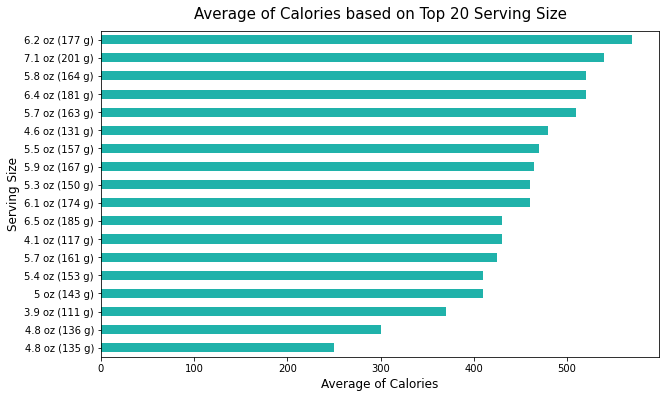

In [24]:
top20_serving_sizes = df['Serving Size'][:20]

#visualize average of calories based on top 20 serving size
plt.figure(figsize = (10,6))
df.groupby(top20_serving_sizes)['Calories'].mean().sort_values(ascending = True).plot(kind = 'barh', color = 'lightseagreen')
plt.title('Average of Calories based on Top 20 Serving Size', fontsize = 15, pad = 12)
plt.xlabel('Average of Calories', fontsize = 12)
plt.ylabel('Serving Size', fontsize = 12)
plt.show()

## Modeling

In [25]:
#transform dataset to dummy variables
df_dummy = pd.get_dummies(df, drop_first = True)
df_dummy.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Serving Size_8.1 oz (230 g),Serving Size_8.3 oz (235 g),Serving Size_8.5 oz (241 g),Serving Size_8.6 oz (244 g),Serving Size_8.8 oz (249 g),Serving Size_9 oz (255 g),Serving Size_9.5 oz (269 g),Serving Size_9.5 oz (270 g),Serving Size_9.6 oz (251 g),Serving Size_9.6 oz (272 g)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,0,0,0,0,0,0,0,0,0,0
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,0,0,0,0,0,0,0,0,0,0
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,0,0,0,0,0,0,0,0,0,0
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,0,0,0,0,0,0,0,0,0,0
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#feature scaling
mms = MinMaxScaler()
mms.fit_transform(df_dummy)

array([[0.15957447, 0.11320755, 0.11016949, ..., 0.        , 0.        ,
        0.        ],
       [0.13297872, 0.06603774, 0.06779661, ..., 0.        , 0.        ,
        0.        ],
       [0.19680851, 0.18867925, 0.19491525, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18085106, 0.09433962, 0.09322034, ..., 0.        , 0.        ,
        0.        ],
       [0.43085106, 0.27358491, 0.27118644, ..., 0.        , 0.        ,
        0.        ],
       [0.21808511, 0.14150943, 0.13559322, ..., 0.        , 0.        ,
        0.        ]])

In [27]:
#split data
X = df_dummy.drop('Calories', axis = 1)
y = df_dummy['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(182, 393)
(182,)
(78, 393)
(78,)


In [28]:
#define function of cross validation 
def cross_val(model):
    pred = cross_val_score(model, X, y, cv = 10)
    return pred.mean()

#define function of print evaluate
def print_evaluate(actual, predicted):  
    mae = metrics.mean_absolute_error(actual, predicted)
    mse = metrics.mean_squared_error(actual, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(actual, predicted))
    r2_square = metrics.r2_score(actual, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

#define function of evaluate
def evaluate(actual, predicted):
    mae = metrics.mean_absolute_error(actual, predicted)
    mse = metrics.mean_squared_error(actual, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(actual, predicted))
    r2_square = metrics.r2_score(actual, predicted)
    return mae, mse, rmse, r2_square

In [29]:
#linear regression
linreg = LinearRegression(normalize = True)
linreg.fit(X_train, y_train)

LinearRegression(normalize=True)

In [30]:
#check prediction
y_pred = linreg.predict(X_test)
print(y_pred)

[ 606.84932855  266.65989502  434.83456525  361.96686292  292.03045493
  735.36991303  234.04656361  168.13929422  504.36510369  238.86063028
  625.99175791  477.44041609  392.30067459  251.19878136  344.5782079
  208.23835847  591.48551226  460.89670882  218.86058022  196.08334509
   24.03639546  150.5602814   461.46375876  256.5898769   391.67290508
  546.49652254  508.95682682  601.2362308   269.31604884  491.7855652
  290.07506705  639.90564962  125.23052766  828.49860666  163.40194852
  131.76244488  340.26398765  424.30690267   87.94514165  220.92458637
  307.38354324  311.83689799  519.27672545  322.81022033  604.86309871
  367.23017521   74.16063989  437.14919487  280.03919292  238.04731732
  319.79596928  157.42977772  498.75055081  540.13727548  398.56763623
  449.47994668   43.33254757  460.00845173  430.73928438  254.57846777
  308.51722378  175.2588418   351.95413698   57.16256517  499.60627799
  506.96838234  749.50015023   27.63582661  272.63041599  161.62386373
  201.63

In [31]:
#check the intercept
print('Intercept :', linreg.intercept_)

Intercept : 61.04600104421985


In [32]:
#check coefficient
coeff = pd.DataFrame(linreg.coef_, X.columns, columns = ['Coefficient'])
print(coeff) 

                               Coefficient
Calories from Fat                 0.158294
Total Fat                         1.201149
Total Fat (% Daily Value)         0.894683
Saturated Fat                     3.068828
Saturated Fat (% Daily Value)     0.672238
...                                    ...
Serving Size_9 oz (255 g)        26.018919
Serving Size_9.5 oz (269 g)       2.034731
Serving Size_9.5 oz (270 g)      13.396976
Serving Size_9.6 oz (251 g)     -17.558430
Serving Size_9.6 oz (272 g)      29.822565

[393 rows x 1 columns]


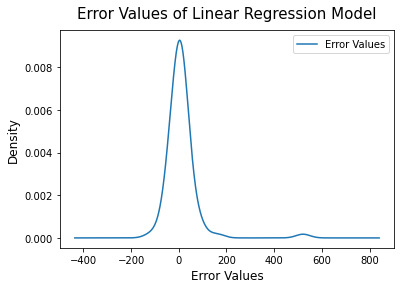

In [33]:
#check error values of linear regression model
pd.DataFrame({'Error Values': (y_test - y_pred)}).plot.kde()
plt.title('Error Values of Linear Regression Model', fontsize = 15, pad = 12)
plt.xlabel('Error Values', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.show()

In [34]:
#prediction
test_pred = linreg.predict(X_test)
train_pred = linreg.predict(X_train)

#check evaluation of linear regression model
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data = [['Linear Regression', *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 33.72862505314495
MSE: 4987.181368099301
RMSE: 70.61997853369328
R2 Square 0.9303355183313957
__________________________________
Train set evaluation:
_____________________________________
MAE: 6.291036068152887e-13
MSE: 6.883116886606075e-25
RMSE: 8.29645519882201e-13
R2 Square 1.0
__________________________________


In [35]:
#ridge regression
ridge = Ridge(alpha = 0.5, solver = 'cholesky', tol = 0.0001)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

#prediction
test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

#evaluation
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data = [['Ridge Regression', *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index = True)

Test set evaluation:
_____________________________________
MAE: 3.850056705560008
MSE: 23.326391750493695
RMSE: 4.829740339862351
R2 Square 0.999674160438421
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8206681424540673
MSE: 1.1148998551081692
RMSE: 1.0558881830516758
R2 Square 0.9999783348589737
__________________________________


In [36]:
#compare of model selection
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,33.728625,4987.181368,70.619979,0.930336,0.998056
1,Ridge Regression,3.850057,23.326392,4.829740,0.999674,0.998061
